[Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

# Python Machine Learning - Code Examples

# Chapter 12 - Training Artificial Neural Networks for Image Recognition

### Overview

- [Modeling complex functions with artificial neural networks](#Modeling-complex-functions-with-artificial-neural-networks)
  - [Single-layer neural network recap](#Single-layer-neural-network-recap)
  - [Introducing the multi-layer neural network architecture](#Introducing-the-multi-layer-neural-network-architecture)
  - [Activating a neural network via forward propagation](#Activating-a-neural-network-via-forward-propagation)
- [Classifying handwritten digits](#Classifying-handwritten-digits)
  - [Obtaining the MNIST dataset](#Obtaining-the-MNIST-dataset)
  - [Implementing a multi-layer perceptron](#Implementing-a-multi-layer-perceptron)
- [Training an artificial neural network](#Training-an-artificial-neural-network)
  - [Computing the logistic cost function](#Computing-the-logistic-cost-function)
  - [Training neural networks via backpropagation](#Training-neural-networks-via-backpropagation)
- [Developing your intuition for backpropagation](#Developing-your-intuition-for-backpropagation)
- [Debugging neural networks with gradient checking](#Debugging-neural-networks-with-gradient-checking)
- [Convergence in neural networks](#Convergence-in-neural-networks)
- [Other neural network architectures](#Other-neural-network-architectures)
  - [Convolutional Neural Networks](#Convolutional-Neural-Networks)
  - [Recurrent Neural Networks](#Recurrent-Neural-Networks)
- [A few last words about neural network implementation](#A-few-last-words-about-neural-network-implementation)
- [Summary](#Summary)

<br>
<br>

In [1]:
from IPython.display import Image

# Modeling complex functions with artificial neural networks

...

## Single-layer neural network recap

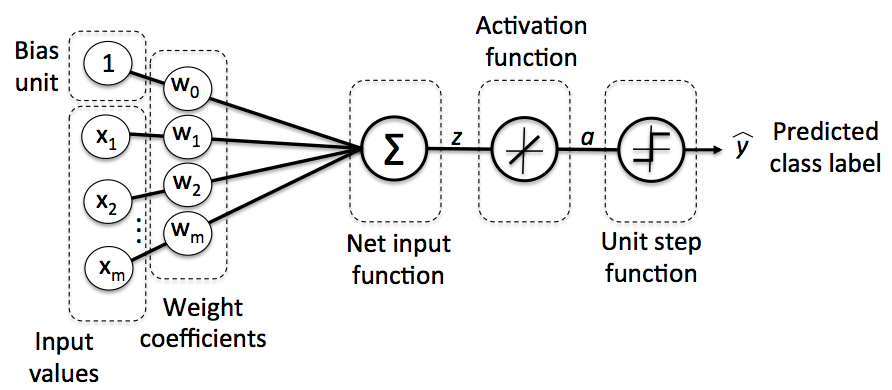

In [2]:
Image(filename='./images/12_01.png', width=600) 

<br>
<br>

## Introducing the multi-layer neural network architecture

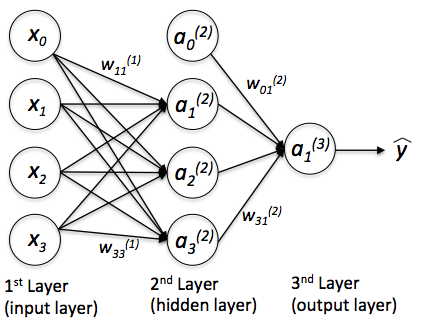

In [3]:
Image(filename='./images/12_02.png', width=400) 

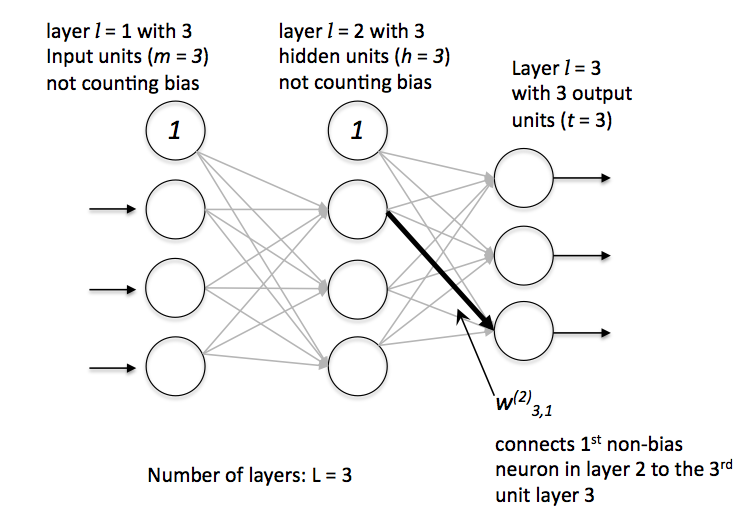

In [4]:
Image(filename='./images/12_03.png', width=500) 

<br>
<br>

## Activating a neural network via forward propagation

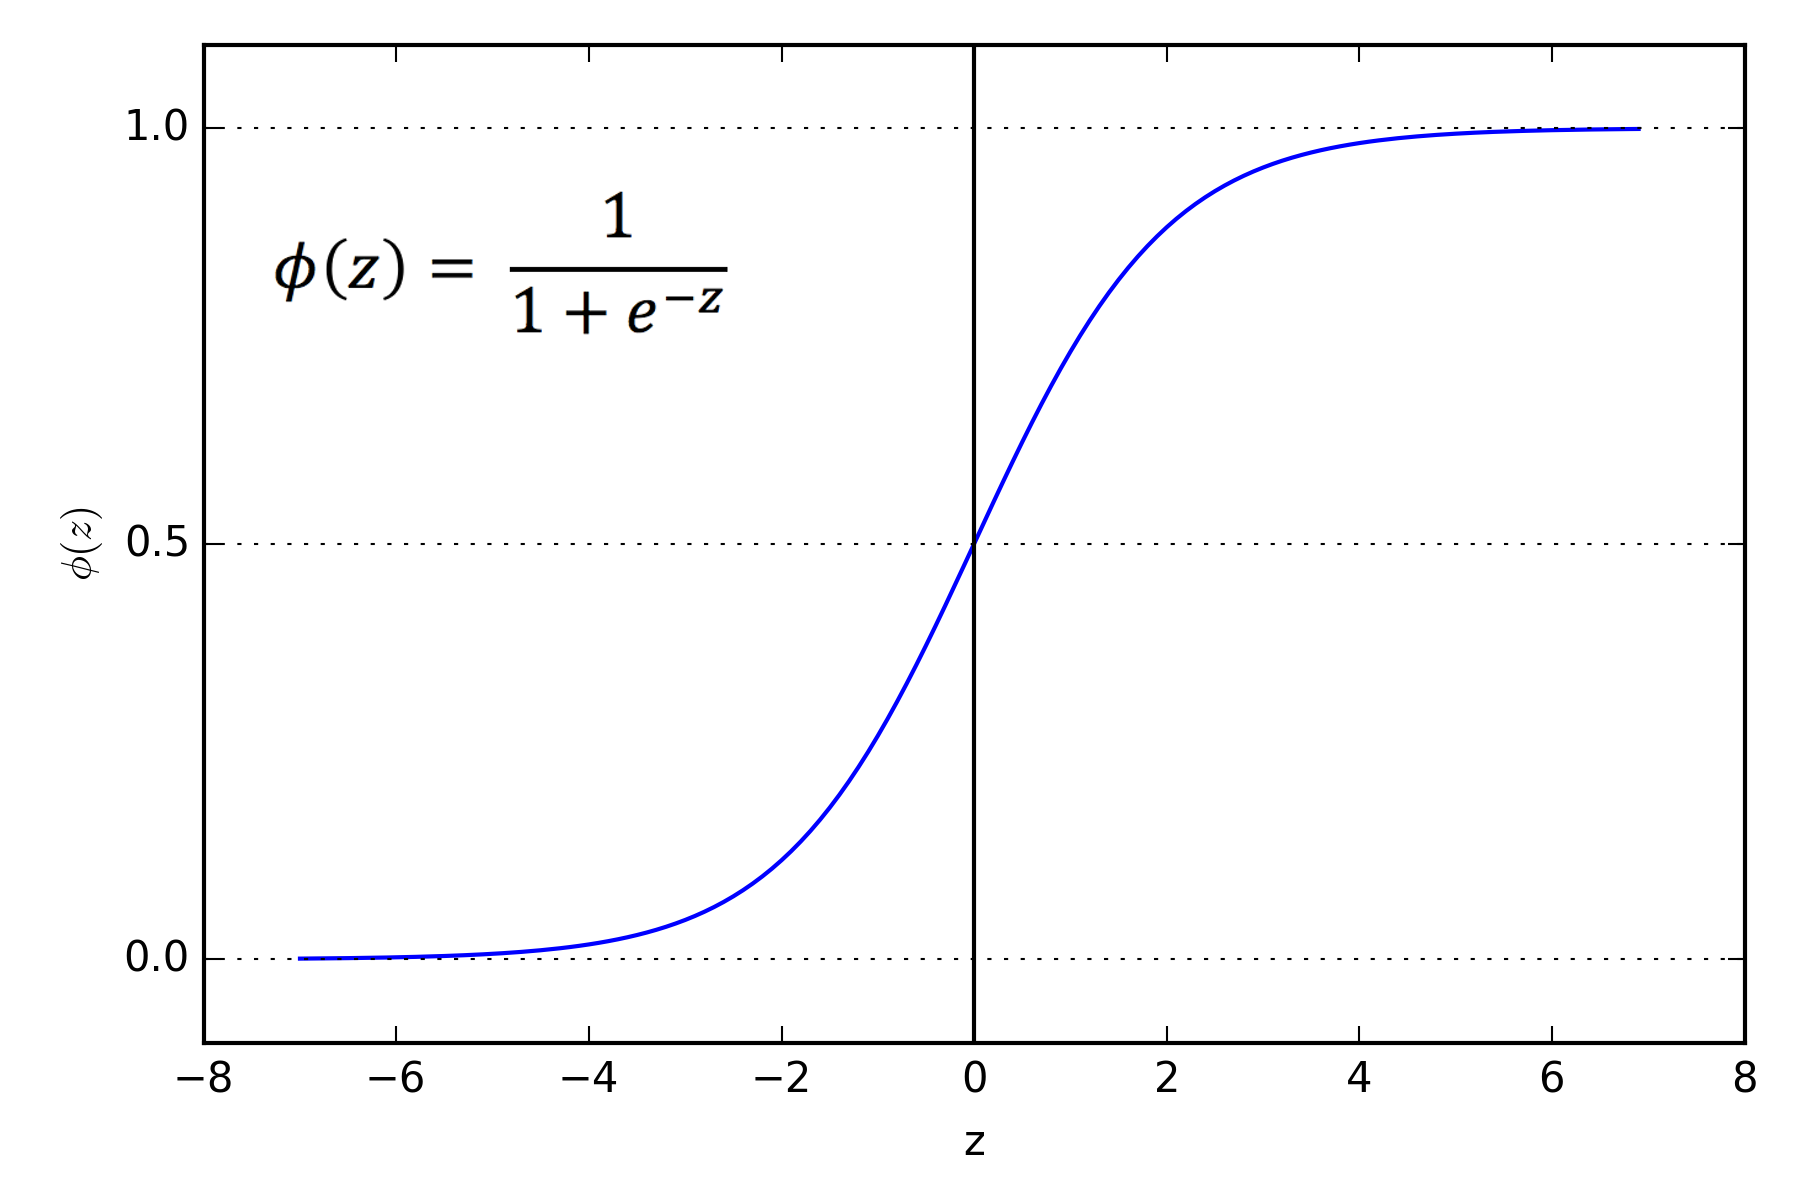

In [5]:
Image(filename='./images/12_04.png', width=500) 

<br>
<br>

# Classifying handwritten digits

...

## Obtaining the MNIST dataset

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 samples)
- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)
- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 samples)
- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)

In this section, we will only be working with a subset of MNIST, thus, we only need to download the training set images and training set labels. After downloading the files, I recommend unzipping the files using the Unix/Linux gzip tool from the terminal for efficiency, e.g., using the command 

    gzip *ubyte.gz -d
 
in your local MNIST download directory, or, using your favorite unzipping tool if you are working with a machine running on Microsoft Windows. The images are stored in byte form, and using the following function, we will read them into NumPy arrays that we will use to train our MLP.


In [6]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' 
                                % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' 
                               % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [7]:
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

FileNotFoundError: [Errno 2] No such file or directory: 'mnist/train-labels-idx1-ubyte'

In [ ]:
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Visualize the first digit of each class:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

Visualize 25 different versions of "7":

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

Uncomment the following lines to optionally save the data in CSV format. 
However, note that those CSV files will take up a substantial amount of storage space:

- train_img.csv 1.1 GB (gigabytes)
- train_labels.csv 1.4 MB (megabytes)
- test_img.csv 187.0 MB
- test_labels 144 KB (kilobytes)


In [ ]:
#np.savetxt('train_img.csv', X_train, fmt='%i', delimiter=',')
#np.savetxt('train_labels.csv', y_train, fmt='%i', delimiter=',')
#X_train = np.genfromtxt('train_img.csv', dtype=int, delimiter=',')
#y_train = np.genfromtxt('train_labels.csv', dtype=int, delimiter=',')

#np.savetxt('test_img.csv', X_test, fmt='%i', delimiter=',')
#np.savetxt('test_labels.csv', y_test, fmt='%i', delimiter=',')
#X_test = np.genfromtxt('test_img.csv', dtype=int, delimiter=',')
#y_test = np.genfromtxt('test_labels.csv', dtype=int, delimiter=',')


<br>
<br>

## Implementing a multi-layer perceptron

In [ ]:
import numpy as np
from scipy.special import expit
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
      Number of output units, should be equal to the
      number of unique class labels.

    n_features : int
      Number of features (dimensions) in the target dataset.
      Should be equal to the number of columns in the X array.

    n_hidden : int (default: 30)
      Number of hidden units.

    l1 : float (default: 0.0)
      Lambda value for L1-regularization.
      No regularization if l1=0.0 (default)

    l2 : float (default: 0.0)
      Lambda value for L2-regularization.
      No regularization if l2=0.0 (default)

    epochs : int (default: 500)
      Number of passes over the training set.

    eta : float (default: 0.001)
      Learning rate.

    alpha : float (default: 0.0)
      Momentum constant. Factor multiplied with the
      gradient of the previous epoch t-1 to improve
      learning speed
      w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    
    decrease_const : float (default: 0.0)
      Decrease constant. Shrinks the learning rate
      after each epoch via eta / (1 + epoch*decrease_const)

    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent circles.

    minibatches : int (default: 1)
      Divides training data into k minibatches for efficiency.
      Normal gradient descent learning if k=1 (default).

    random_state : int (default: None)
      Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001, 
                 alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        z3 : array, shape = [n_output_units, n_samples]
          Net input of output layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        """
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        output : array, shape = [n_output_units, n_samples]
          Activation of the output layer (feedforward)

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float
          Regularized cost.

        """
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------

        grad1 : array, shape = [n_hidden_units, n_features]
          Gradient of the weight matrix w1.

        grad2 : array, shape = [n_output_units, n_hidden_units]
            Gradient of the weight matrix w2.

        """
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
          Predicted class labels.

        """
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        y : array, shape = [n_samples]
          Target class labels.

        print_progress : bool (default: False)
          Prints progress as the number of epochs
          to stderr.

        Returns:
        ----------
        self

        """
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):
            
            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [ ]:
nn = NeuralNetMLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=1000, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)

In [ ]:
nn.fit(X_train, y_train, print_progress=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [ ]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

In [ ]:
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
#plt.savefig('./figures/cost2.png', dpi=300)
plt.show()

In [ ]:
import sys

y_train_pred = nn.predict(X_train)

if sys.version_info < (3, 0):
    acc = (np.sum(y_train == y_train_pred, axis=0)).astype('float') / X_train.shape[0]
else:
    acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc * 100))

In [ ]:
y_test_pred = nn.predict(X_test)

if sys.version_info < (3, 0):
    acc = (np.sum(y_test == y_test_pred, axis=0)).astype('float') / X_test.shape[0]
else:
    acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

In [ ]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

In [ ]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

<br>
<br>

# Training an artificial neural network

...

## Computing the logistic cost function

In [ ]:
Image(filename='./images/12_10.png', width=300) 

<br>
<br>

## Training neural networks via backpropagation

In [ ]:
Image(filename='./images/12_11.png', width=400) 

In [ ]:
Image(filename='./images/12_12.png', width=500) 

<br>
<br>

# Developing your intuition for backpropagation

...

# Debugging neural networks with gradient checking

In [ ]:
Image(filename='./images/12_13.png', width=500) 

In [ ]:
import numpy as np
from scipy.special import expit
import sys


class MLPGradientCheck(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
      Number of output units, should be equal to the
      number of unique class labels.

    n_features : int
      Number of features (dimensions) in the target dataset.
      Should be equal to the number of columns in the X array.

    n_hidden : int (default: 30)
      Number of hidden units.

    l1 : float (default: 0.0)
      Lambda value for L1-regularization.
      No regularization if l1=0.0 (default)

    l2 : float (default: 0.0)
      Lambda value for L2-regularization.
      No regularization if l2=0.0 (default)

    epochs : int (default: 500)
      Number of passes over the training set.

    eta : float (default: 0.001)
      Learning rate.

    alpha : float (default: 0.0)
      Momentum constant. Factor multiplied with the
      gradient of the previous epoch t-1 to improve
      learning speed
      w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    
    decrease_const : float (default: 0.0)
      Decrease constant. Shrinks the learning rate
      after each epoch via eta / (1 + epoch*decrease_const)

    shuffle : bool (default: False)
      Shuffles training data every epoch if True to prevent circles.

    minibatches : int (default: 1)
      Divides training data into k minibatches for efficiency.
      Normal gradient descent learning if k=1 (default).

    random_state : int (default: None)
      Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001, 
                 alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        z3 : array, shape = [n_output_units, n_samples]
          Net input of output layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        """
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        output : array, shape = [n_output_units, n_samples]
          Activation of the output layer (feedforward)

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float
          Regularized cost.

        """
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------

        grad1 : array, shape = [n_hidden_units, n_features]
          Gradient of the weight matrix w1.

        grad2 : array, shape = [n_output_units, n_hidden_units]
            Gradient of the weight matrix w2.

        """
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def _gradient_checking(self, X, y_enc, w1, w2, epsilon, grad1, grad2):
        """ Apply gradient checking (for debugging only)

        Returns
        ---------
        relative_error : float
          Relative error between the numerically
          approximated gradients and the backpropagated gradients.

        """
        num_grad1 = np.zeros(np.shape(w1))
        epsilon_ary1 = np.zeros(np.shape(w1))
        for i in range(w1.shape[0]):
            for j in range(w1.shape[1]):
                epsilon_ary1[i, j] = epsilon
                a1, z2, a2, z3, a3 = self._feedforward(X, w1 - epsilon_ary1, w2)
                cost1 = self._get_cost(y_enc, a3, w1-epsilon_ary1, w2)
                a1, z2, a2, z3, a3 = self._feedforward(X, w1 + epsilon_ary1, w2)
                cost2 = self._get_cost(y_enc, a3, w1 + epsilon_ary1, w2)
                num_grad1[i, j] = (cost2 - cost1) / (2 * epsilon)
                epsilon_ary1[i, j] = 0

        num_grad2 = np.zeros(np.shape(w2))
        epsilon_ary2 = np.zeros(np.shape(w2))
        for i in range(w2.shape[0]):
            for j in range(w2.shape[1]):
                epsilon_ary2[i, j] = epsilon
                a1, z2, a2, z3, a3 = self._feedforward(X, w1, w2 - epsilon_ary2)
                cost1 = self._get_cost(y_enc, a3, w1, w2 - epsilon_ary2)
                a1, z2, a2, z3, a3 = self._feedforward(X, w1, w2 + epsilon_ary2)
                cost2 = self._get_cost(y_enc, a3, w1, w2 + epsilon_ary2)
                num_grad2[i, j] = (cost2 - cost1) / (2 * epsilon)
                epsilon_ary2[i, j] = 0

        num_grad = np.hstack((num_grad1.flatten(), num_grad2.flatten()))
        grad = np.hstack((grad1.flatten(), grad2.flatten()))
        norm1 = np.linalg.norm(num_grad - grad)
        norm2 = np.linalg.norm(num_grad)
        norm3 = np.linalg.norm(grad)
        relative_error = norm1 / (norm2 + norm3)
        return relative_error

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
          Predicted class labels.

        """
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        y : array, shape = [n_samples]
          Target class labels.

        print_progress : bool (default: False)
          Prints progress as the number of epochs
          to stderr.

        Returns:
        ----------
        self

        """
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):
            
            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)
                
                ## start gradient checking
                grad_diff = self._gradient_checking(X=X_data[idx], y_enc=y_enc[:, idx],
                                                  w1=self.w1, w2=self.w2,
                                                  epsilon=1e-5,
                                                  grad1=grad1, grad2=grad2)
                
                if grad_diff <= 1e-7:
                    print('Ok: %s' % grad_diff)
                elif grad_diff <= 1e-4:
                    print('Warning: %s' % grad_diff)
                else:
                    print('PROBLEM: %s' % grad_diff)

                # update weights; [alpha * delta_w_prev] for momentum learning
                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [ ]:
nn_check = MLPGradientCheck(n_output=10, 
                            n_features=X_train.shape[1], 
                            n_hidden=10, 
                            l2=0.0, 
                            l1=0.0, 
                            epochs=10, 
                            eta=0.001,
                            alpha=0.0,
                            decrease_const=0.0,
                            minibatches=1, 
                            shuffle=False,
                            random_state=1)

In [ ]:
nn_check.fit(X_train[:5], y_train[:5], print_progress=False)

<br>
<br>

# Convergence in neural networks

In [ ]:
Image(filename='./images/12_14.png', width=500) 

<br>
<br>

# Other neural network architectures

...

## Convolutional Neural Networks

In [ ]:
Image(filename='./images/12_15.png', width=400) 

In [ ]:
Image(filename='./images/12_16.png', width=700) 

<br>
<br>

## Recurrent Neural Networks

In [ ]:
Image(filename='./images/12_17.png', width=400) 

<br>
<br>

# A few last words about neural network implementation

...

# Summary

...